In [1]:
import os
from glob import glob
from tqdm import tqdm 

import numpy as np
import matplotlib.pyplot as plt 

import tifffile 
import json
import h5py

from PIL import Image
from scipy import ndimage

from tkinter import Tcl
#from random import shuffle

from sklearn.utils import shuffle

#from random import Random

from preProcessingUtils import *

In [2]:
root_dir = 'D:\sagar\Data'
scans = os.listdir(root_dir)

In [4]:
path_roi = []
path_notRoi = []

for s in scans:
    scan_path = os.path.join(root_dir, s)
    try:
        for r in os.listdir(os.path.join(scan_path, 'roi')):
            path_roi.append((os.path.join(root_dir, s, 'roi', r)))
    except:
        pass
    try:    
        for nr in os.listdir(os.path.join(scan_path, 'not_roi')):
            path_notRoi.append((os.path.join(root_dir, s, 'not_roi', nr)))
    except: 
        pass
   

print('Found ', len(path_roi), ' ROI and ', len(path_notRoi), ' notROI sample')    

Found  532  ROI and  561  notROI sample


In [5]:
# Shuffleing and choosing the sample for test and train 
path_roi = shuffle(path_roi, random_state=3)
path_notRoi = shuffle(path_notRoi, random_state=3)

In [6]:
tmp_roi_path, test_roi_path = path_roi[0:500], path_roi[500:533]
tmp_notRoi_path, test_notRoi_path = path_notRoi[0:500], path_notRoi[500:561]

In [7]:
train_roi_path, val_roi_path = tmp_roi_path[0:425], tmp_roi_path[425:500]
train_notRoi_path, val_notRoi_path = tmp_notRoi_path[0:425], tmp_notRoi_path[425:500]

In [8]:
def create_formatted_data(dataPath, xdim=300, ydim=300, zdim=300, resize_factor=(0.5, 0.5, 0.5)):
    
    print('Loading ', len(dataPath), ' Samples.... ')
    
    formattedData = np.zeros(shape=(len(dataPath), int(xdim*resize_factor[0]), int(ydim*resize_factor[1]), int(zdim*resize_factor[2]), 1), dtype=np.float32)

    for i, afile in enumerate(tqdm(dataPath)):
        raw_vol = []
        #sorting the slices according to their names like in windows 
        slices = Tcl().call('lsort', '-dict', os.listdir(afile))
        for aSlice in slices:
            img = Image.open(os.path.join(afile, aSlice))
            imgarray = np.array(img)
            raw_vol.append(imgarray)

        raw_vol = np.asarray(raw_vol)
        raw_vol = np.nan_to_num(raw_vol)
        raw_vol = np.clip(raw_vol, 0.0005, 0.003)
        raw_vol = ndimage.zoom(raw_vol, resize_factor, order=1)
        # Normalize the data : 0-1
        vol = norm(raw_vol)
        formattedData[i, :, :, :, 0] = vol
    
    print('Loaded ', len(dataPath), ' Samples with shape ', formattedData.shape, '\n')
    return formattedData

In [9]:
train_roi = create_formatted_data(train_roi_path)
val_roi = create_formatted_data(val_roi_path)
test_roi = create_formatted_data(test_roi_path)


train_notRoi = create_formatted_data(train_notRoi_path)
val_notRoi = create_formatted_data(val_notRoi_path)
test_notRoi = create_formatted_data(test_notRoi_path)

Loading  425  Samples.... 


100%|████████████████████████████████████████████████████████████████████████████████| 425/425 [18:02<00:00,  2.55s/it]


Loaded  425  Samples with shape  (425, 150, 150, 150, 1) 

Loading  75  Samples.... 


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [03:10<00:00,  2.53s/it]


Loaded  75  Samples with shape  (75, 150, 150, 150, 1) 

Loading  32  Samples.... 


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [01:21<00:00,  2.55s/it]


Loaded  32  Samples with shape  (32, 150, 150, 150, 1) 

Loading  425  Samples.... 


 77%|█████████████████████████████████████████████████████████████▋                  | 328/425 [13:55<04:14,  2.62s/it]D:\sagar\roiClassifier\preProcessingUtils.py:48: RuntimeWarning: invalid value encountered in true_divide
  v = ((v - minVal)/maxVal)
100%|████████████████████████████████████████████████████████████████████████████████| 425/425 [18:11<00:00,  2.57s/it]


Loaded  425  Samples with shape  (425, 150, 150, 150, 1) 

Loading  75  Samples.... 


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [03:15<00:00,  2.61s/it]


Loaded  75  Samples with shape  (75, 150, 150, 150, 1) 

Loading  61  Samples.... 


100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [02:40<00:00,  2.63s/it]

Loaded  61  Samples with shape  (61, 150, 150, 150, 1) 



In [10]:
# Creating the label 
train_roi_label = []
for i in range(len(train_roi_path)):
    train_roi_label.append([1, 0])

train_roi_label = np.array(train_roi_label)


# Creating the label 
val_roi_label = []
for i in range(len(val_roi_path)):
    val_roi_label.append([1, 0])

val_roi_label = np.array(val_roi_label)

# Creating the label 
test_roi_label = []
for i in range(len(test_roi_path)):
    test_roi_label.append([1, 0])

test_roi_label = np.array(test_roi_label)


# Creating the label 
train_notRoi_label = []
for i in range(len(train_notRoi_path)):
    train_notRoi_label.append([0, 1])

train_notRoi_label = np.array(train_notRoi_label)

# Creating the label 
val_notRoi_label = []
for i in range(len(val_notRoi_path)):
    val_notRoi_label.append([0, 1])

val_notRoi_label = np.array(val_notRoi_label)


# Creating the label 
test_notRoi_label = []
for i in range(len(test_notRoi_path)):
    test_notRoi_label.append([0, 1])

test_notRoi_label = np.array(test_notRoi_label)

In [20]:
hf = h5py.File('D:\\sagar\\roiClassifier\\trainData\\TrainValTest_Data_150_150_150_Clip_Norm.hdf5', 'w')
hf.create_dataset('roi', data=train_roi, compression='gzip')
hf.create_dataset('notRoi', data=train_notRoi, compression='gzip')
hf.create_dataset('val_roi', data=val_roi, compression='gzip')
hf.create_dataset('val_notRoi', data=val_notRoi, compression='gzip')
hf.create_dataset('test_roi', data=test_roi, compression='gzip')
hf.create_dataset('test_notRoi', data=test_notRoi, compression='gzip')
hf.close()

In [21]:
hf = h5py.File('D:\\sagar\\roiClassifier\\trainData\\TrainValTest_Label_150_150_150_Clip_Norm.hdf5', 'w')
hf.create_dataset('roi', data=train_roi_label, compression='gzip')
hf.create_dataset('notRoi', data=train_notRoi_label, compression='gzip')
hf.create_dataset('val_roi', data=val_roi_label, compression='gzip')
hf.create_dataset('val_notRoi', data=val_notRoi_label, compression='gzip')
hf.create_dataset('test_roi', data=test_roi_label, compression='gzip')
hf.create_dataset('test_notRoi', data=test_notRoi_label, compression='gzip')
hf.close()

In [ ]:
# Data Augmentation : 8 Set Possible
# 1. Original Data 
# 2,3,4,5 Rotate 45, 90, 180 
# 6, 7, 8 Flip  

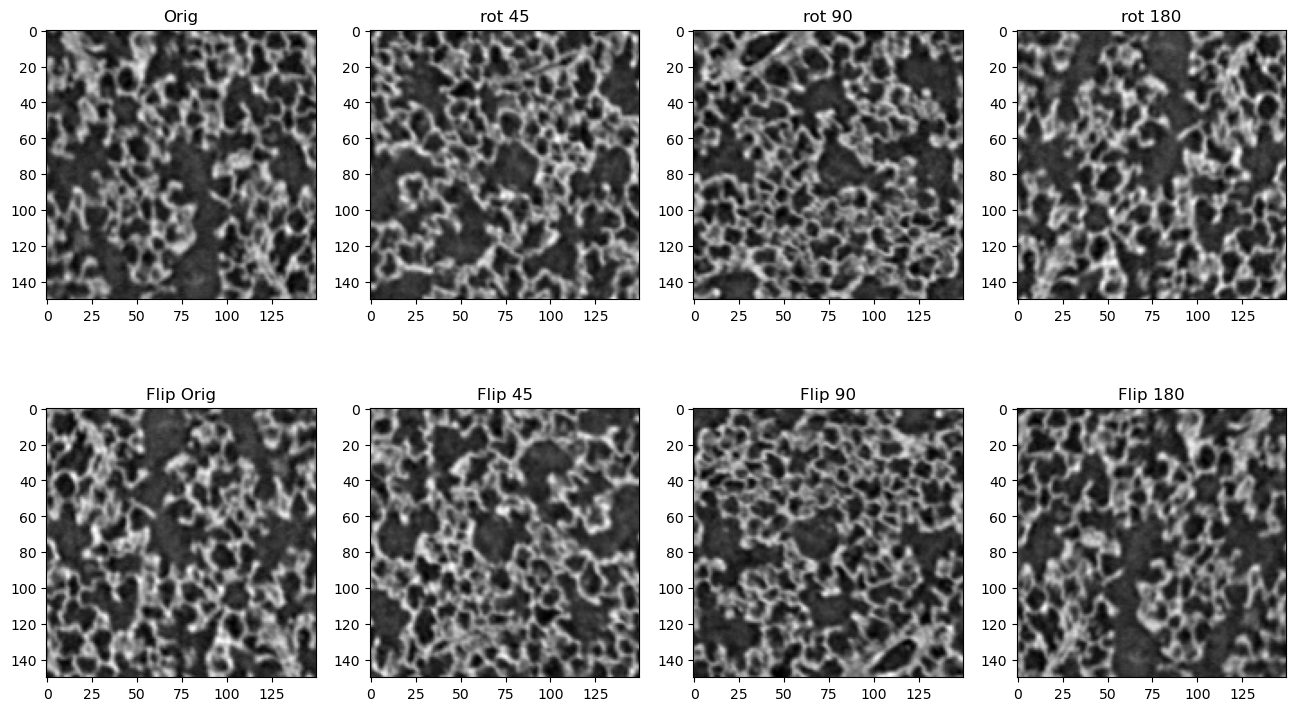

In [15]:
aVol = train_roi[1, :, :, :, 0]
fig, ax = plt.subplots(2,4, figsize=(16,9))
ax[0,0].imshow(aVol[75, :, :,], cmap='gray')
ax[0,0].set_title('Orig')

rot45 = ndimage.rotate(aVol, 45, reshape=False)
ax[0,1].imshow(rot45[75, :, :], cmap='gray')
ax[0,1].set_title('rot 45')

rot90 = ndimage.rotate(aVol, 90, reshape=False)
ax[0,2].imshow(rot90[75, :, :], cmap='gray')
ax[0,2].set_title('rot 90')

rot180 = ndimage.rotate(aVol, 180, reshape=False)
ax[0,3].imshow(rot180[75, :, :], cmap='gray')
ax[0,3].set_title('rot 180')

###########

flip = np.flip(aVol)
ax[1,0].imshow(flip[75, :, :], cmap='gray')
ax[1,0].set_title('Flip Orig')


flip45 = np.flip(rot45)
ax[1,1].imshow(flip45[75, :, :], cmap='gray')
ax[1,1].set_title('Flip 45')

flip90 = np.flip(rot90)
ax[1,2].imshow(flip90[75, :, :], cmap='gray')
ax[1,2].set_title('Flip 90')

flip180 = np.flip(rot180)
ax[1,3].imshow(flip180[75, :, :], cmap='gray')
ax[1,3].set_title('Flip 180')
#plt.savefig('aug.svg')
plt.show()

plt.close()

In [ ]:
import gc

In [ ]:
# Rotate formatted volume 
def rotateFormattedVol(arr, angle, reshape=False):
    result = np.empty_like(arr)
    for i in range(arr.shape[0]):
        vol = arr[i, :, :, :, 0]
        vol = ndimage.rotate(vol, angle, reshape=reshape)
        vol[ vol < 0] = 0
        vol[ vol > 1] = 1
        result[i, :, :, :, 0] = vol 
        
    return result


# Flip formatted volume 
def flipFormattedVol(arr):
    result = np.empty_like(arr)
    for i in range(arr.shape[0]):
        vol = arr[i, :, :, :, 0]
        vol = np.flip(vol)
        result[i, :, :, :, 0] = vol 
    
    return result
    

In [ ]:
trainDataROI = np.concatenate( (train_roi, flipFormattedVol(train_roi), 
                                rotateFormattedVol(train_roi, 45), flipFormattedVol(rotateFormattedVol(train_roi, 45)), 
                                rotateFormattedVol(train_roi, 90), flipFormattedVol(rotateFormattedVol(train_roi, 90)), 
                                rotateFormattedVol(train_roi, 180), flipFormattedVol(rotateFormattedVol(train_roi, 180))),
                                axis=0)

train_label_ROI = np.concatenate((train_roi_label, train_roi_label,
                                  train_roi_label, train_roi_label,
                                  train_roi_label, train_roi_label,
                                  train_roi_label, train_roi_label), axis=0)

In [ ]:
del train_roi
del train_roi_label
gc.collect()

In [ ]:
trainDatanotROI = np.concatenate( (train_notRoi, flipFormattedVol(train_notRoi), 
                                rotateFormattedVol(train_notRoi, 45), flipFormattedVol(rotateFormattedVol(train_notRoi, 45)), 
                                rotateFormattedVol(train_notRoi, 90), flipFormattedVol(rotateFormattedVol(train_notRoi, 90)), 
                                rotateFormattedVol(train_notRoi, 180), flipFormattedVol(rotateFormattedVol(train_notRoi, 180))),
                                axis=0)

train_label_notROI = np.concatenate((train_notRoi_label, train_notRoi_label,
                                  train_notRoi_label, train_notRoi_label,
                                  train_notRoi_label, train_notRoi_label,
                                  train_notRoi_label, train_notRoi_label), axis=0)

In [ ]:
hf = h5py.File('E:\\sagar\\Data\\TrainDataAug.hdf5', 'w')
hf.create_dataset('roi', data=trainDataROI, compression='gzip')
hf.create_dataset('notRoi', data=trainDatanotROI, compression='gzip')
hf.close()

In [ ]:
hf = h5py.File('E:\\sagar\\Data\\TrainLabelAug.hdf5', 'w')
hf.create_dataset('roi', data=train_label_ROI, compression='gzip')
hf.create_dataset('notRoi', data=train_label_notROI, compression='gzip')
hf.close()